In [12]:
library(ggplot2)
library(ggthemes)

library(dplyr)
library(readr)
library(scales)

library(stringr)
library(tidyr)

theme_set(theme_minimal())

options(repr.plot.width = 14, repr.plot.height = 7)

In [13]:
df <- read_csv("./data/mobiles_dataset_adjusted.csv")

Rows: 927 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): Company.Name, Model.Name, Mobile.Weight, RAM, Front.Camera, Back.Ca...
dbl (9): Battery.Capacity.mAh, Screen.Size.inches, Launched.Price.Pakistan.U...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [1]:
df

Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan.USD,Launched.Price.India.USD,Launched.Price.China.USD,Launched.Price.USA.USD,Launched.Price.Dubai.USD,Launched.Year,RAM.size,device_category
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,809.9964,879.989,811.86,799,755.73,2024,6,Premium
Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,845.9964,934.989,853.86,849,809.73,2024,6,Premium
Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,881.9964,989.989,909.86,899,863.73,2024,6,Premium
Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,899.9964,989.989,867.86,899,863.73,2024,6,Premium
Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,935.9964,1044.989,909.86,949,917.73,2024,6,Premium
Apple,iPhone 16 Plus 512GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,989.9964,1154.989,979.86,999,971.73,2024,6,Premium
Apple,iPhone 16 Pro 128GB,206g,6GB,12MP / 4K,50MP + 12MP,A17 Pro,4400,6.1,1025.9964,1099.989,979.86,999,944.73,2024,6,Premium
Apple,iPhone 16 Pro 256GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,4400,6.1,1061.9964,1154.989,993.86,1049,998.73,2024,8,Premium
Apple,iPhone 16 Pro 512GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,4400,6.1,1133.9964,1264.989,1049.86,1099,1052.73,2024,8,Premium


## Part 1: Analytical Questions

### Quetsion 1

Does battery capacity influence the launched price of a smartphone? Check this variability across all currencies. Is there any type of difference between behaviors?

In [17]:
price_columns <- c("Launched.Price.Pakistan.USD", "Launched.Price.India.USD", "Launched.Price.China.USD", "Launched.Price.USA.USD", "Launched.Price.Dubai.USD")
colors <- c("Pakistan" = "red", "India" = "blue", "China" = "green", "USA" = "purple", "Dubai" = "orange")

df_long <- df %>%
  select(Battery.Capacity.mAh, all_of(price_columns)) %>%
  pivot_longer(cols = -Battery.Capacity.mAh, names_to = "Country", values_to = "Price") %>%
  mutate(Country = gsub("Launched.Price.|.USD", "", Country))

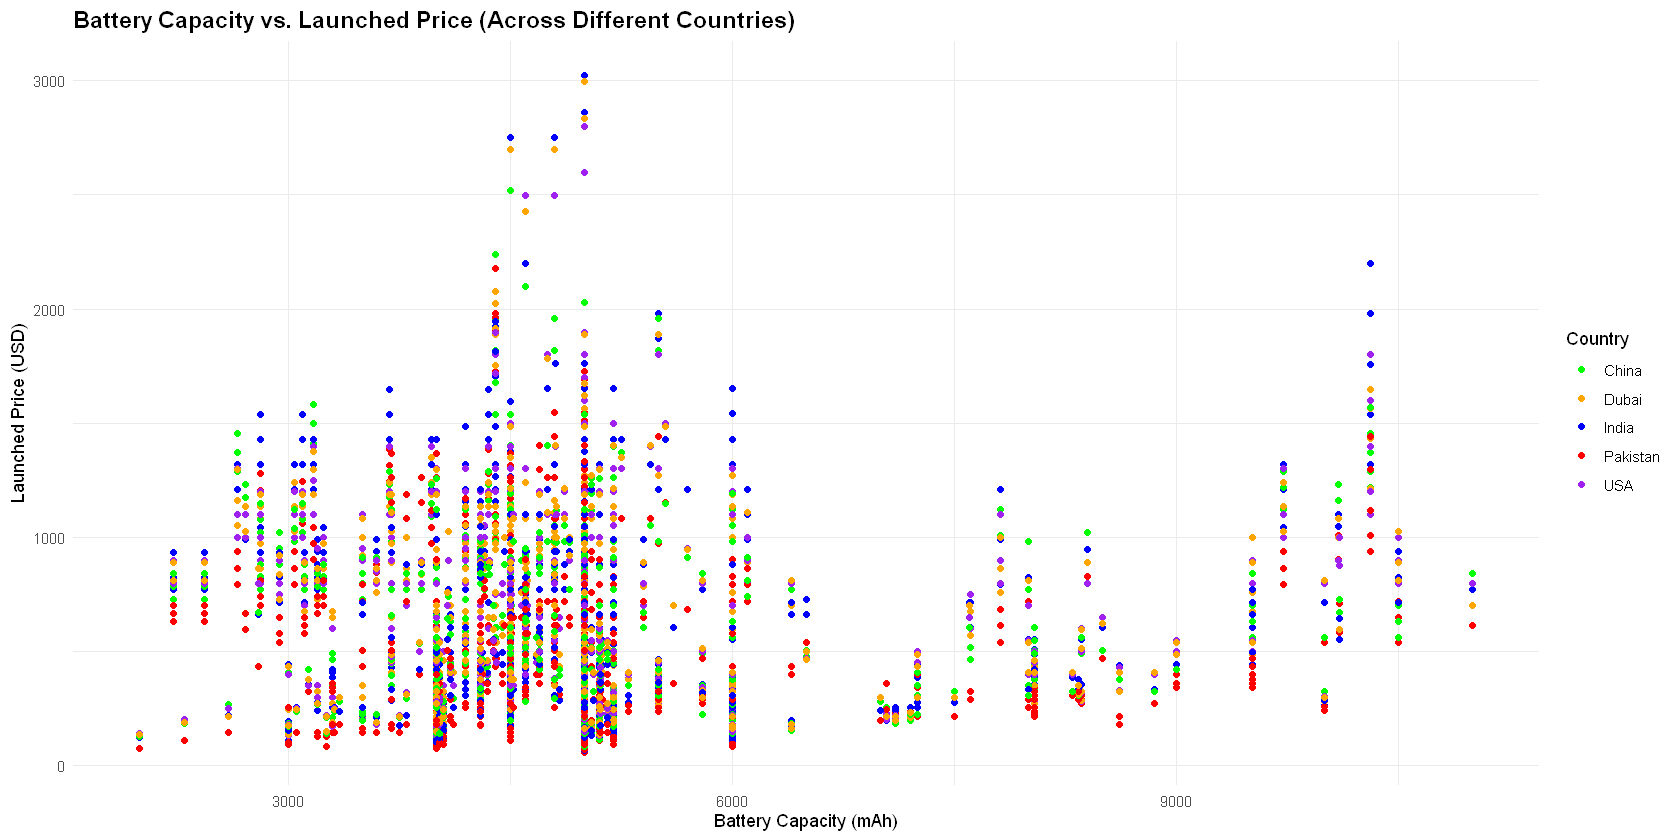

In [ ]:
ggplot(df_long, aes(x = Battery.Capacity.mAh, y = Price, color = Country)) +
  geom_point() +
  scale_color_manual(values = colors) +
  labs(
    x = "Battery Capacity (mAh)",
    y = "Launched Price (USD)",
    title = "Battery Capacity vs. Launched Price (Across Different Countries)",
    color = "Country"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, face = "bold"))

`geom_smooth()` using formula = 'y ~ x'


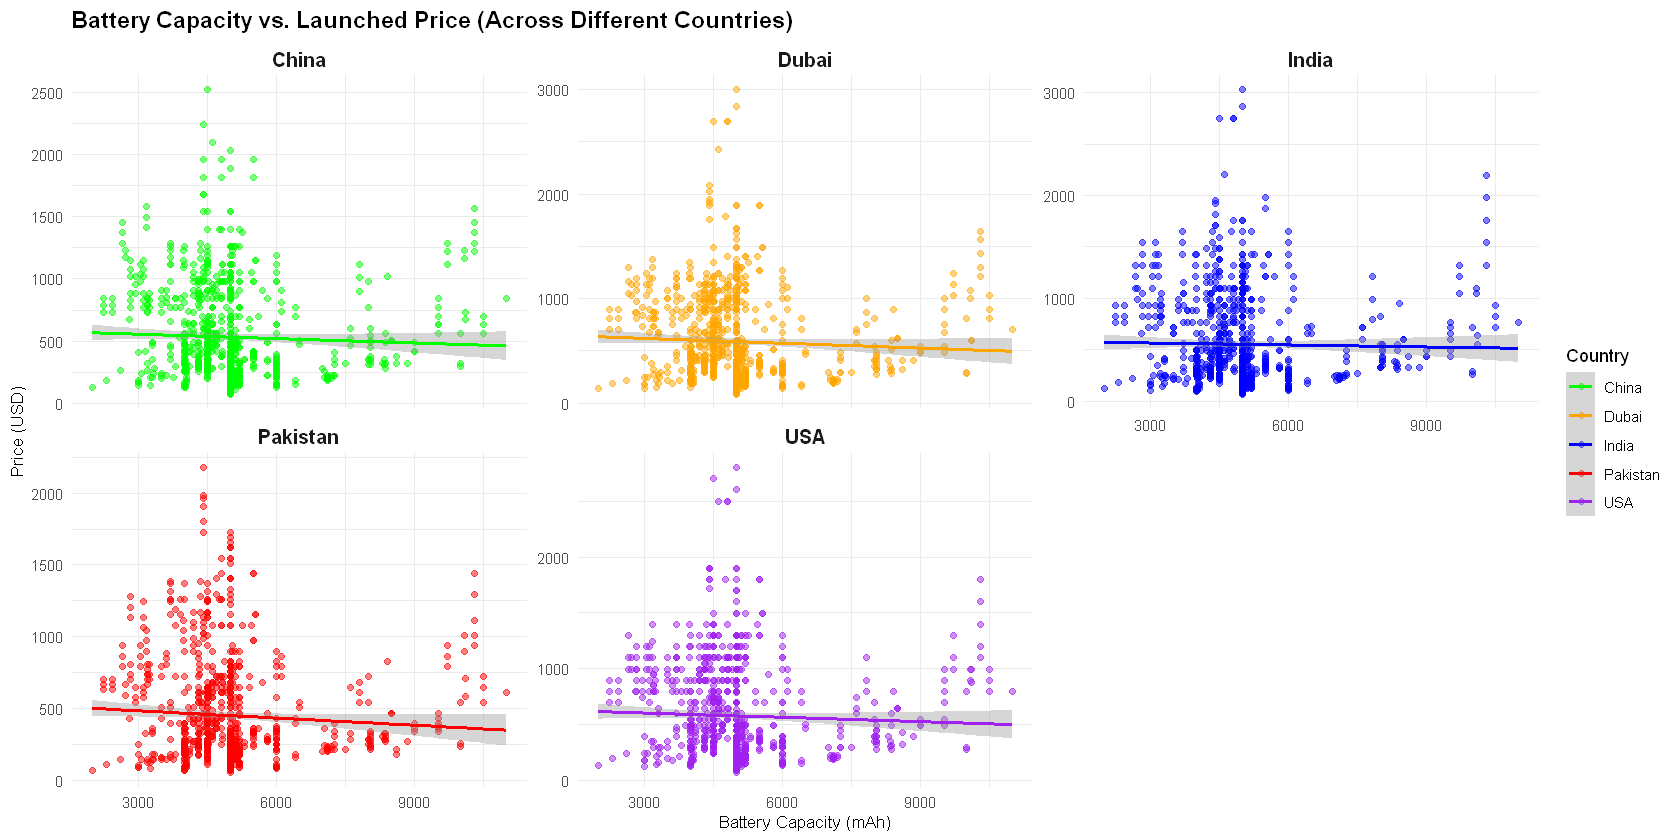

In [16]:
ggplot(df_long, aes(x = Battery.Capacity.mAh, y = Price)) +
  geom_point(aes(color = Country), alpha = 0.5) +
  geom_smooth(method = "lm", aes(color = Country)) +
  facet_wrap(~ Country, scales = "free_y", labeller = label_wrap_gen(width = 10)) +
  scale_color_manual(values = colors) +
  labs(
    x = "Battery Capacity (mAh)",
    y = "Price (USD)",
    title = "Battery Capacity vs. Launched Price (Across Different Countries)",
    color = "Country"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    strip.text = element_text(size = 12, face = "bold"),
    axis.title = element_text(size = 10)
  )

According to the plots we can conclude that the correlations between the price and battery capacity are insignificant hence hardly influence each other in 
general case. However it will be interesting to observe this across all the types of smartphones

### Quetsion 2

Does RAM size impact the price of smartphones? 
Check this variability across all currencies.
Is there any type of difference between behaviors?

In [18]:
df_long <- df %>%
  select(RAM.size, all_of(price_columns)) %>%
  pivot_longer(cols = -RAM.size, names_to = "Country", values_to = "Price") %>%
  mutate(Country = gsub("Launched.Price.|.USD", "", Country))

df_long$RAM.size <- factor(df_long$RAM.size, levels = sort(unique(df_long$RAM.size)))

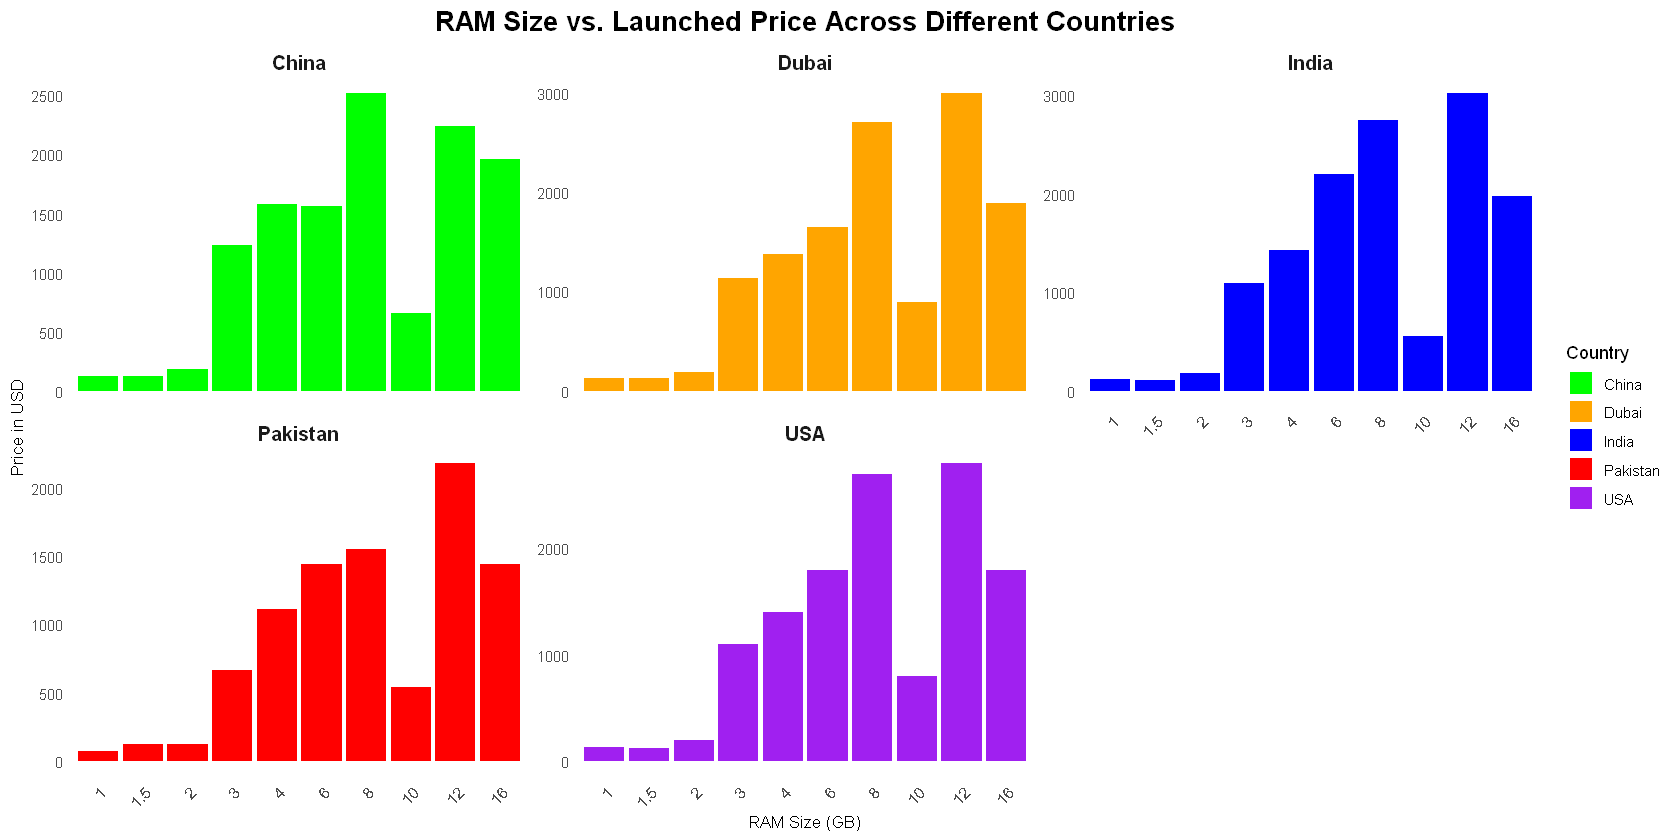

In [19]:
ggplot(df_long, aes(x = RAM.size, y = Price, fill = Country)) +
  geom_bar(stat = "identity", position = "dodge", linewidth = 1.5, show.legend = TRUE) +
  scale_fill_manual(values = colors) +
  facet_wrap(~ Country, scales = "free_y", labeller = label_wrap_gen(width = 10)) +
  labs(
    x = "RAM Size (GB)",
    y = "Price in USD",
    title = "RAM Size vs. Launched Price Across Different Countries"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    strip.text = element_text(size = 12, face = "bold"),
    axis.title = element_text(size = 10),
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


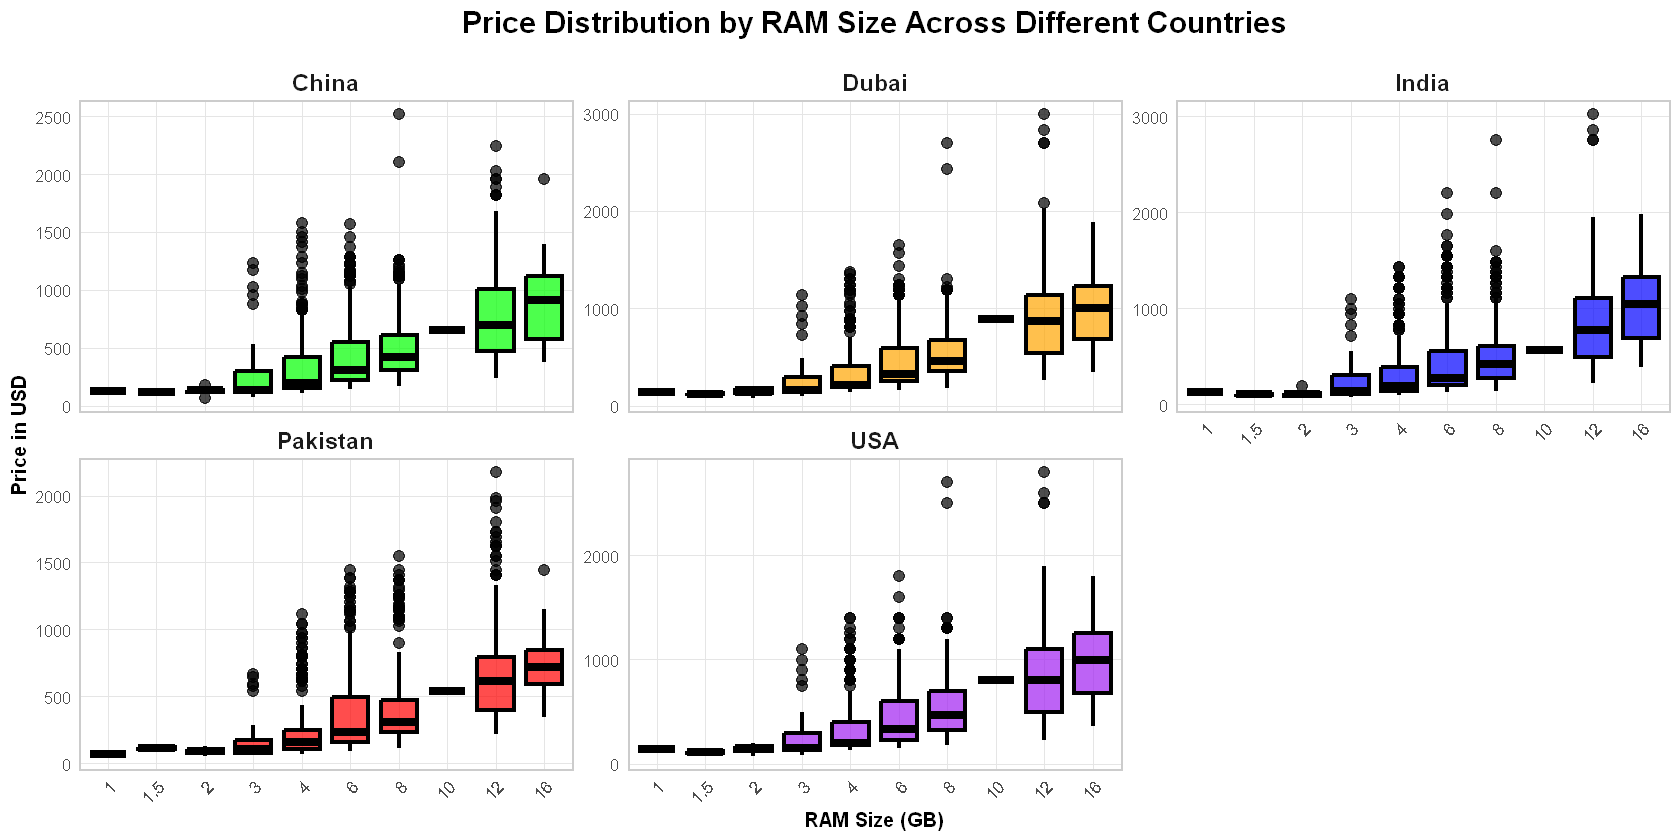

In [20]:
ggplot(df_long, aes(x = RAM.size, y = Price, fill = Country)) +
  geom_boxplot(
    outlier.size = 3, 
    color = "black", 
    linewidth = 1.2, 
    alpha = 0.7
  ) +
  scale_fill_manual(values = colors) +
  facet_wrap(~ Country, scales = "free_y", labeller = label_wrap_gen(width = 10)) +
  labs(
    x = "RAM Size (GB)",
    y = "Price in USD",
    title = "Price Distribution by RAM Size Across Different Countries"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5, margin = margin(b = 15)),
    strip.text = element_text(size = 14, face = "bold"),
    axis.title = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major = element_line(color = "gray90", size = 0.5),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "gray80", fill = NA, linewidth = 1),
    legend.position = "none"
)

Here I noticed something weird with the case of 10GB but, apparently it is OK because we have only one observation with 10 GB RAM, which is logical \
because hey do not occur that often. Nonetheless, we can see here better that the size of the RAM is in fact positively correlated with the price of a smartphone

### Question 3

Do Apple devices have a higher price variation across different regions compared to other brands?
In which country do Apple devices have the highest markup? Are there brands with more
stable pricing across regions?

In [21]:
apple_data <- df %>% filter(Company.Name == 'Apple')

apple_data <- apple_data %>%
  mutate(
    markup_pakistan = (Launched.Price.Pakistan.USD - Launched.Price.USA.USD) / Launched.Price.USA.USD,
    markup_india = (Launched.Price.India.USD - Launched.Price.USA.USD) / Launched.Price.USA.USD,
    markup_china = (Launched.Price.China.USD - Launched.Price.USA.USD) / Launched.Price.USA.USD,
    markup_dubai = (Launched.Price.Dubai.USD - Launched.Price.USA.USD) / Launched.Price.USA.USD
  )

markup_columns <- c('markup_pakistan', 'markup_india', 'markup_china', 'markup_dubai')
apple_data$highest_markup_country <- apply(apple_data[markup_columns], 1, function(x) names(x)[which.max(x)])

price_variation <- df %>%
  group_by(Company.Name) %>%
  summarise(across(all_of(price_columns), ~ sd(.), .names = "sd_{.col}"))

price_variation$mean_sd <- rowMeans(price_variation[, grep("sd_", names(price_variation))])

price_variation_sorted <- price_variation %>%
  arrange(mean_sd)

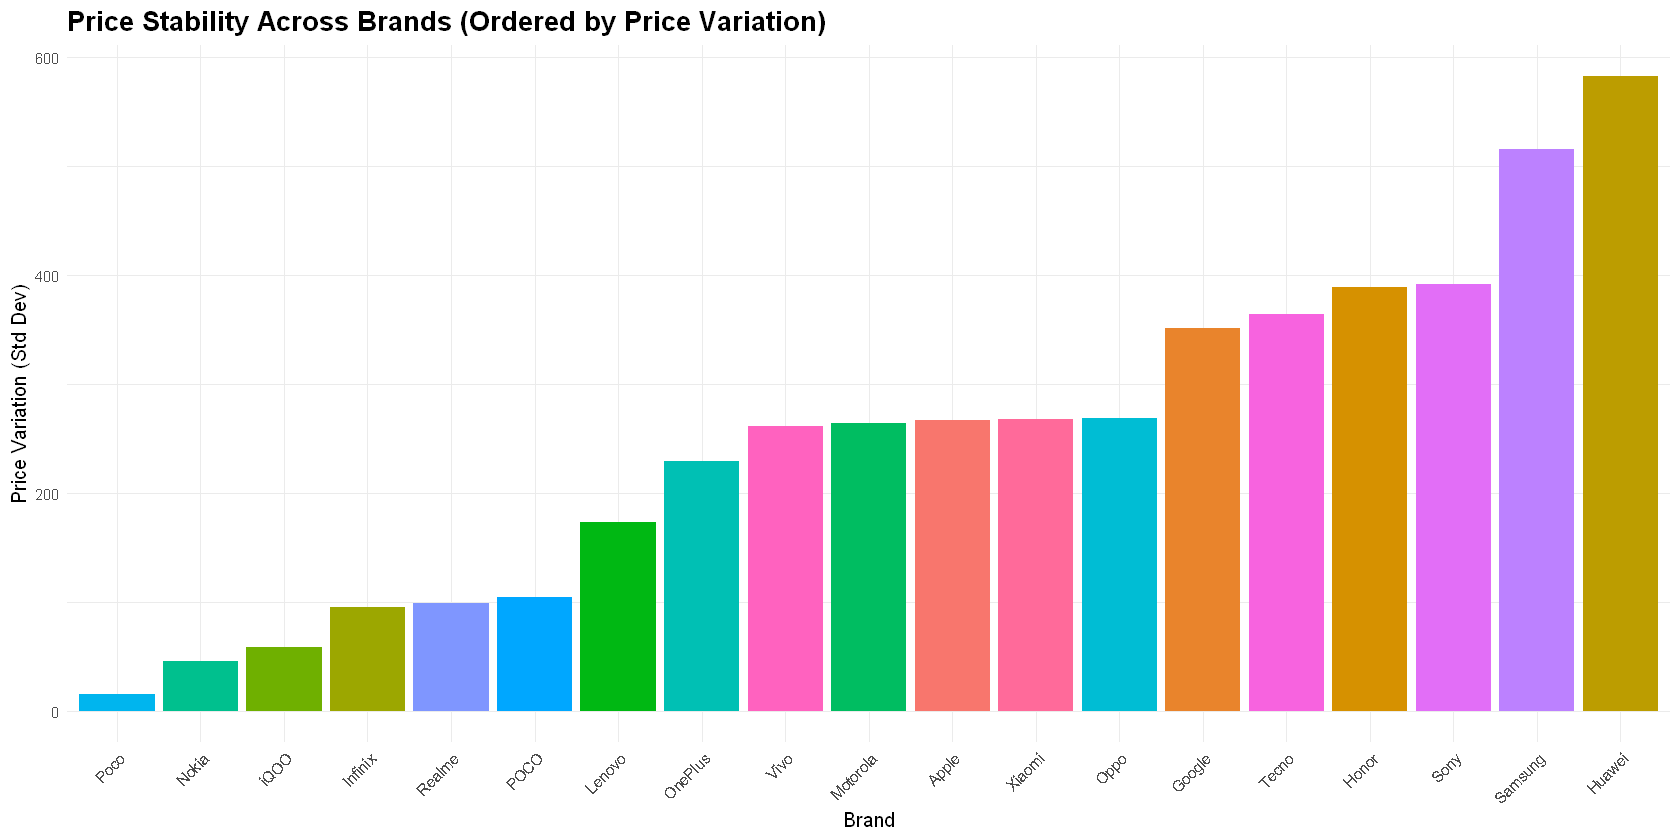

In [22]:
ggplot(price_variation_sorted, aes(x = reorder(Company.Name, mean_sd), y = mean_sd, fill = Company.Name)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Price Stability Across Brands (Ordered by Price Variation)",
    x = "Brand",
    y = "Price Variation (Std Dev)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"
  )

Well it seems the most stable is Poco, and  Apple shows lower stability to my surprise. That is why I thought of looking at the number of observations \
and understood that it interferes with the correct interpretation of stability.Therefore let us plot the stability in a weighted manner according to the number \
of observations.

In [23]:
observations_count <- df %>% 
  group_by(Company.Name) %>% 
  summarise(count = n())

price_variation <- df %>%
  group_by(Company.Name) %>%
  summarise(across(all_of(price_columns), ~ sd(.), .names = "sd_{.col}"))

price_variation$mean_sd <- rowMeans(price_variation[, grep("sd_", names(price_variation))])

price_variation <- price_variation %>%
  left_join(observations_count, by = "Company.Name")

price_variation$weighted_sd <- price_variation$mean_sd * (1 / price_variation$count)

price_variation_sorted <- price_variation %>%
  arrange(weighted_sd)

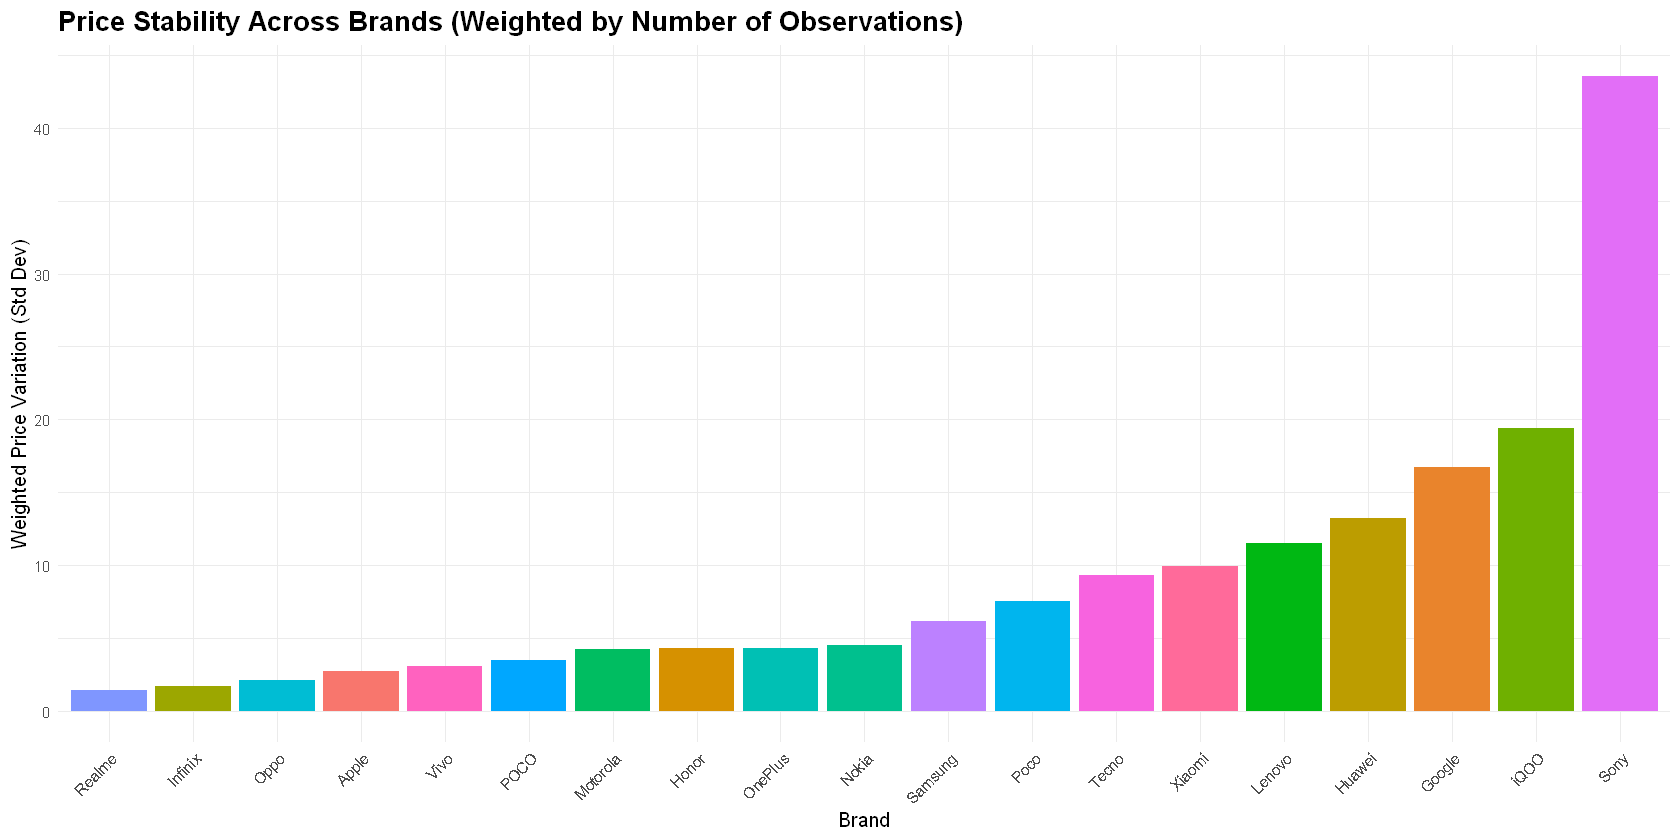

In [24]:
ggplot(price_variation_sorted, aes(x = reorder(Company.Name, weighted_sd), y = weighted_sd, fill = Company.Name)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Price Stability Across Brands (Weighted by Number of Observations)",
    x = "Brand",
    y = "Weighted Price Variation (Std Dev)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"
  )

Well here we go... Now I see that Apple prices are pretty stable!

### Question 4

Do all smartphone brands have flagship and budget-friendly models, or do some
brands only focus on premium devices?

In [25]:
category_counts <- df %>%
  group_by(Company.Name, device_category) %>%
  summarise(count = n()) %>%
  spread(key = device_category, value = count, fill = 0)

category_counts_long <- category_counts %>%
  gather(key = "Segment", value = "Number_of_Models", -Company.Name)

`summarise()` has grouped output by 'Company.Name'. You can override using the
`.groups` argument.


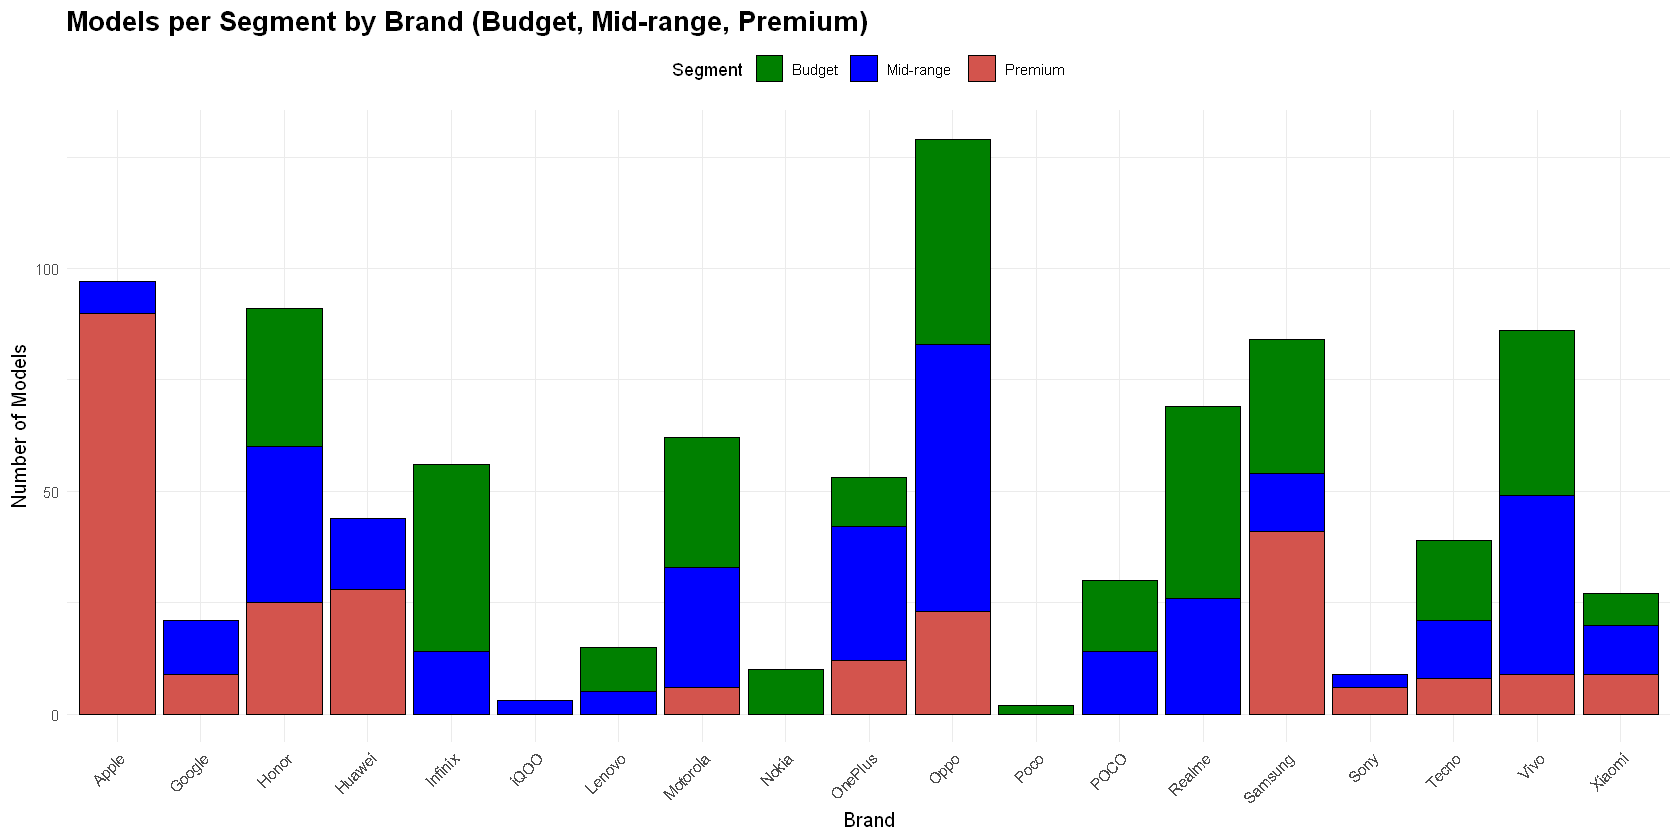

In [ ]:
ggplot(category_counts_long, aes(x = Company.Name, y = Number_of_Models, fill = Segment)) +
  geom_bar(stat = "identity", position = "stack", color = "black") +
  scale_fill_manual(values = c("Budget" = "#008000", "Mid-range" = "#0000FF", "Premium" = "#D3544D")) +
  labs(
    title = "Models per Segment by Brand (Budget, Mid-range, Premium)",
    x = "Brand",
    y = "Number of Models",
    fill = "Segment"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "top"
    )

It is clearly shown which Companies focus on premium Brands; Apple, Huawei, Samsung, Sony \
On the other hand there are companies focusing on mod range; Oppo, IQOO \
There are also ones focused on budget; Infinix, Motorola, Nokia, Realme, Poco \
The rest are more or less balanced

### Question 5

Which region offers the most affordable smartphone prices on average? 
Are there any brands that price their phones significantly lower in one
region compared to others?

In [27]:
brand_avg_prices <- df %>%
  group_by(Company.Name) %>%
  summarise(
    Pakistan = mean(Launched.Price.Pakistan.USD, na.rm = TRUE),
    India = mean(Launched.Price.India.USD, na.rm = TRUE),
    China = mean(Launched.Price.China.USD, na.rm = TRUE),
    Dubai = mean(Launched.Price.Dubai.USD, na.rm = TRUE),
    USA = mean(Launched.Price.USA.USD, na.rm = TRUE)
  )

brand_avg_prices$average_price <- rowMeans(brand_avg_prices[, -1], na.rm = TRUE)
brand_avg_prices <- brand_avg_prices %>%
  arrange(desc(average_price)) %>%
  select(-average_price)

brand_avg_prices_long <- brand_avg_prices %>%
  pivot_longer(cols = -Company.Name, names_to = "Country", values_to = "Average_Price")

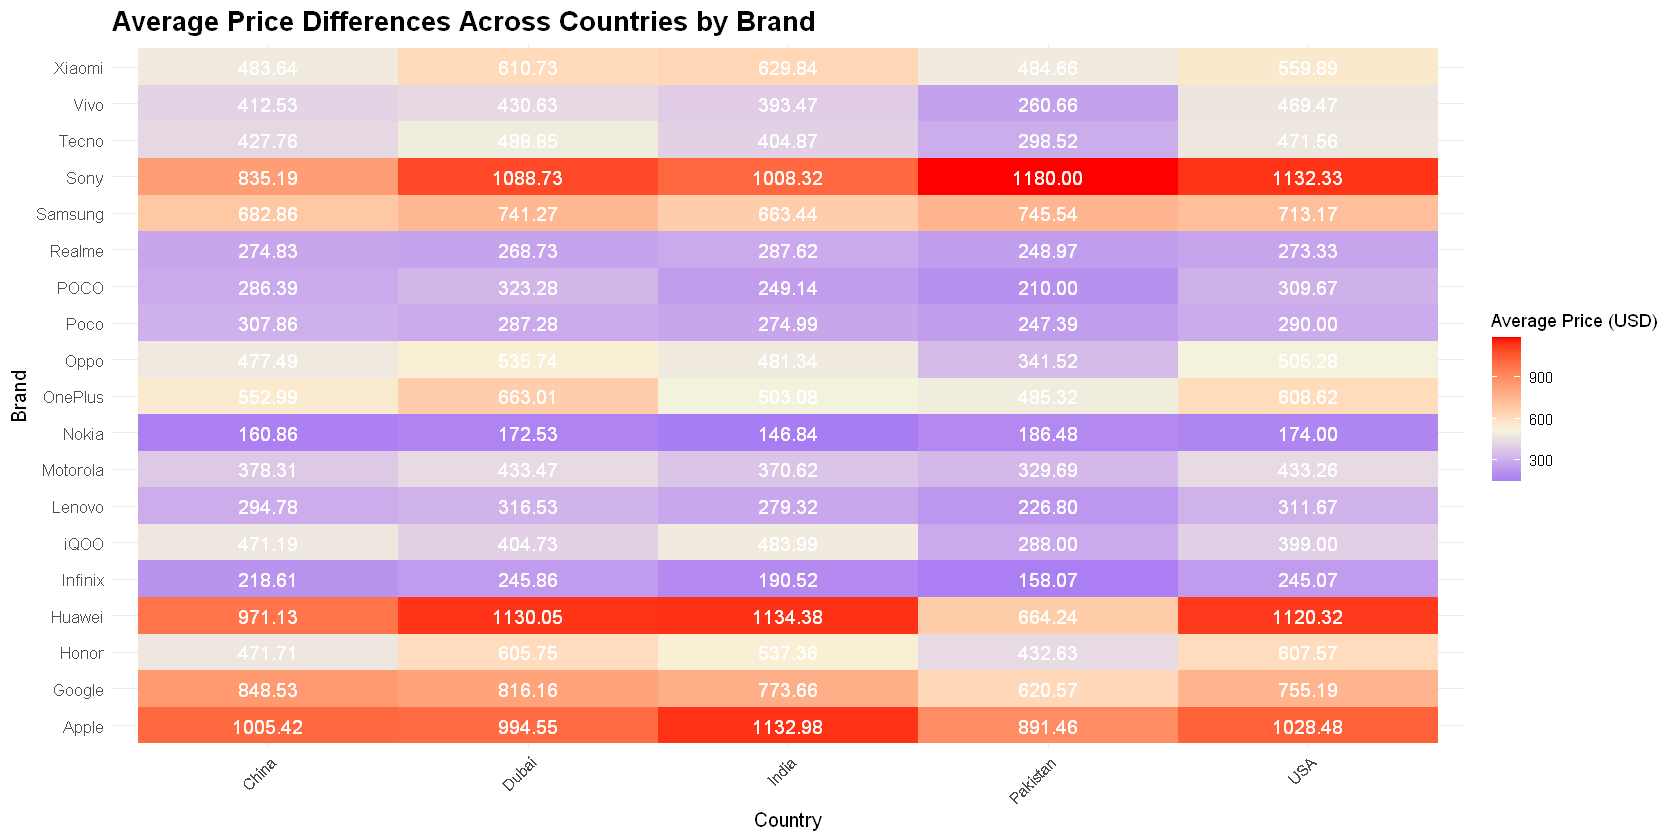

In [28]:
ggplot(brand_avg_prices_long, aes(x = Country, y = Company.Name, fill = Average_Price)) +
  geom_tile() +
  geom_text(aes(label = sprintf("%.2f", Average_Price)), color = "white", size = 4) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "beige", midpoint = mean(brand_avg_prices_long$Average_Price, na.rm = TRUE)) +
  labs(
    title = "Average Price Differences Across Countries by Brand",
    x = "Country",
    y = "Brand",
    fill = "Average Price (USD)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.text.y = element_text(size = 10)
  )

Well the above-mentioned heat map gives a guide into regions giving better prices based on the Company.\
Surprisingly, Apple is cheaper in Pakistan than Dubai :)

## Part 2:  Visualization  

### Question 1

Plot a bar chart for average price per region in USD.

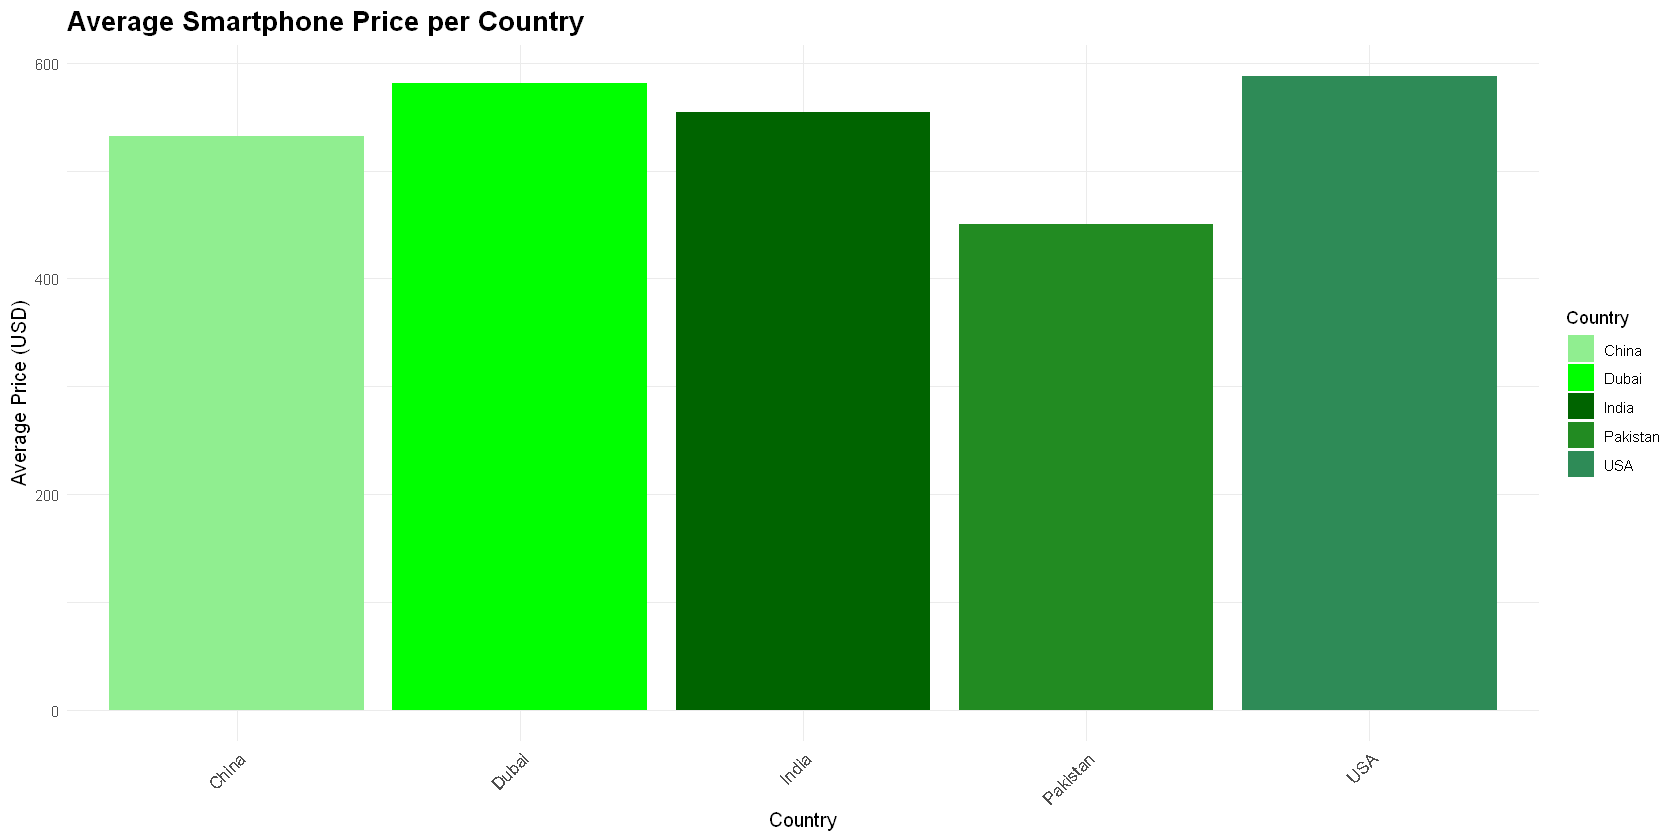

In [29]:
avg_price_per_country <- colMeans(df[price_columns], na.rm = TRUE)

avg_price_df <- data.frame(
  Country = c("Pakistan", "India", "China", "Dubai", "USA"),
  Average_Price = avg_price_per_country
)

ggplot(avg_price_df, aes(x = Country, y = Average_Price, fill = Country)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("lightgreen", "green", "darkgreen", "forestgreen", "seagreen")) +
  labs(
    title = "Average Smartphone Price per Country",
    x = "Country",
    y = "Average Price (USD)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text.x = element_text(size = 10, angle = 45, hjust = 1)
  )


### Question 2

Create a pie chart of the market share of smartphone brands

In [30]:
# NEVER USE A PIE CHART

## Part 3:  Visualization 

### Plot 1

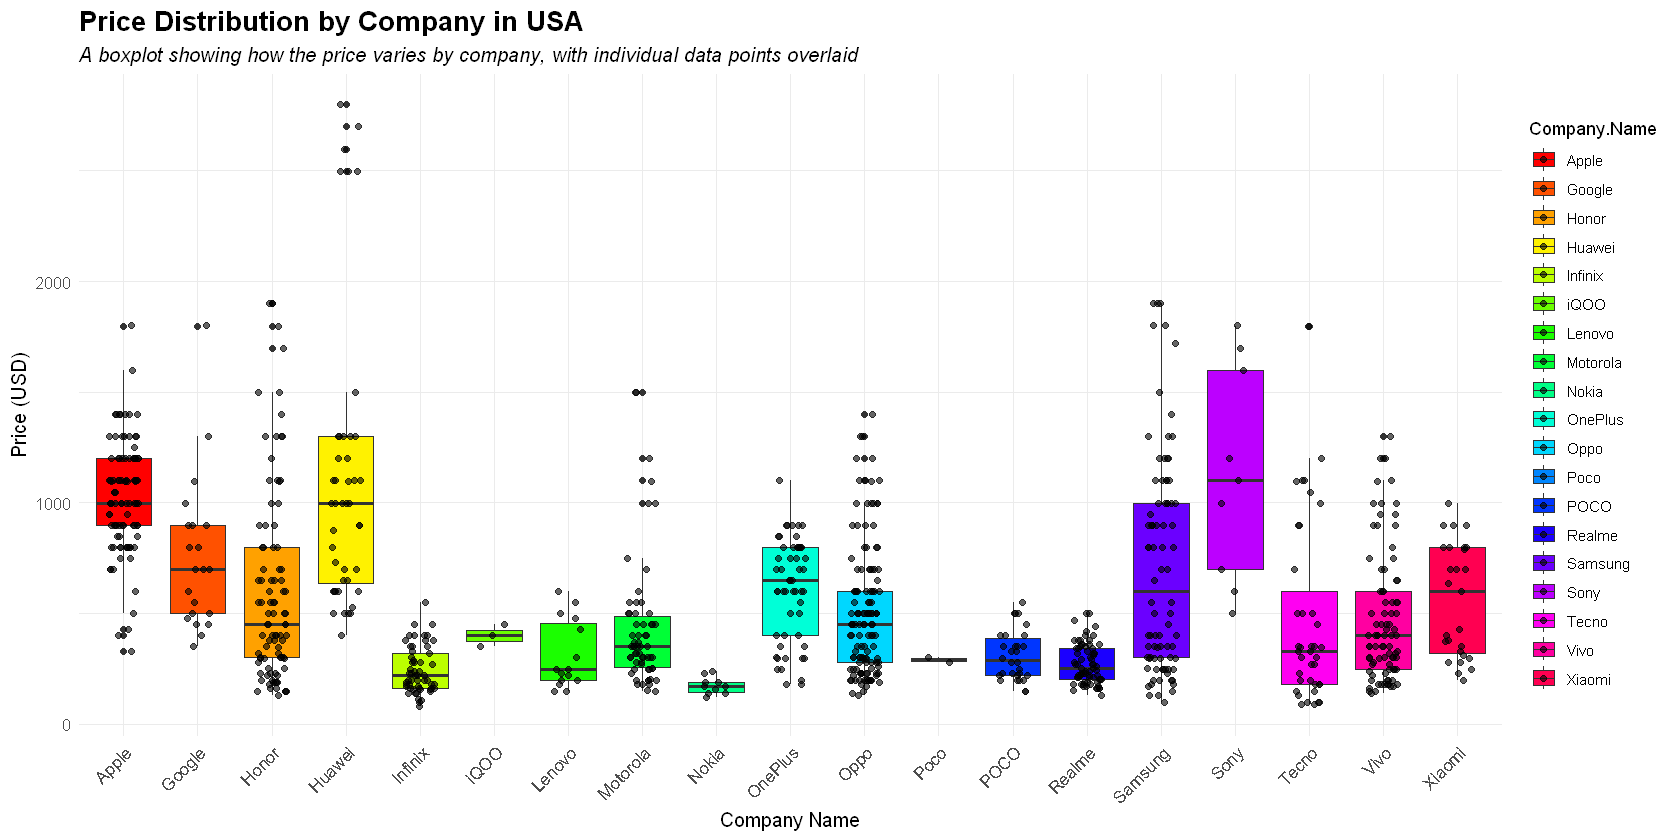

In [31]:
ggplot(df, aes(x = Company.Name, y = Launched.Price.USA.USD, fill = Company.Name)) + 
  geom_boxplot() + 
  geom_jitter(width = 0.2, alpha = 0.6) +
  labs(
    title = "Price Distribution by Company in USA",
    subtitle = "A boxplot showing how the price varies by company, with individual data points overlaid",
    x = "Company Name",
    y = "Price (USD)"
  ) + 
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10)
  ) +
  scale_fill_manual(values = rainbow(length(unique(df$Company.Name))))

### Plot 2

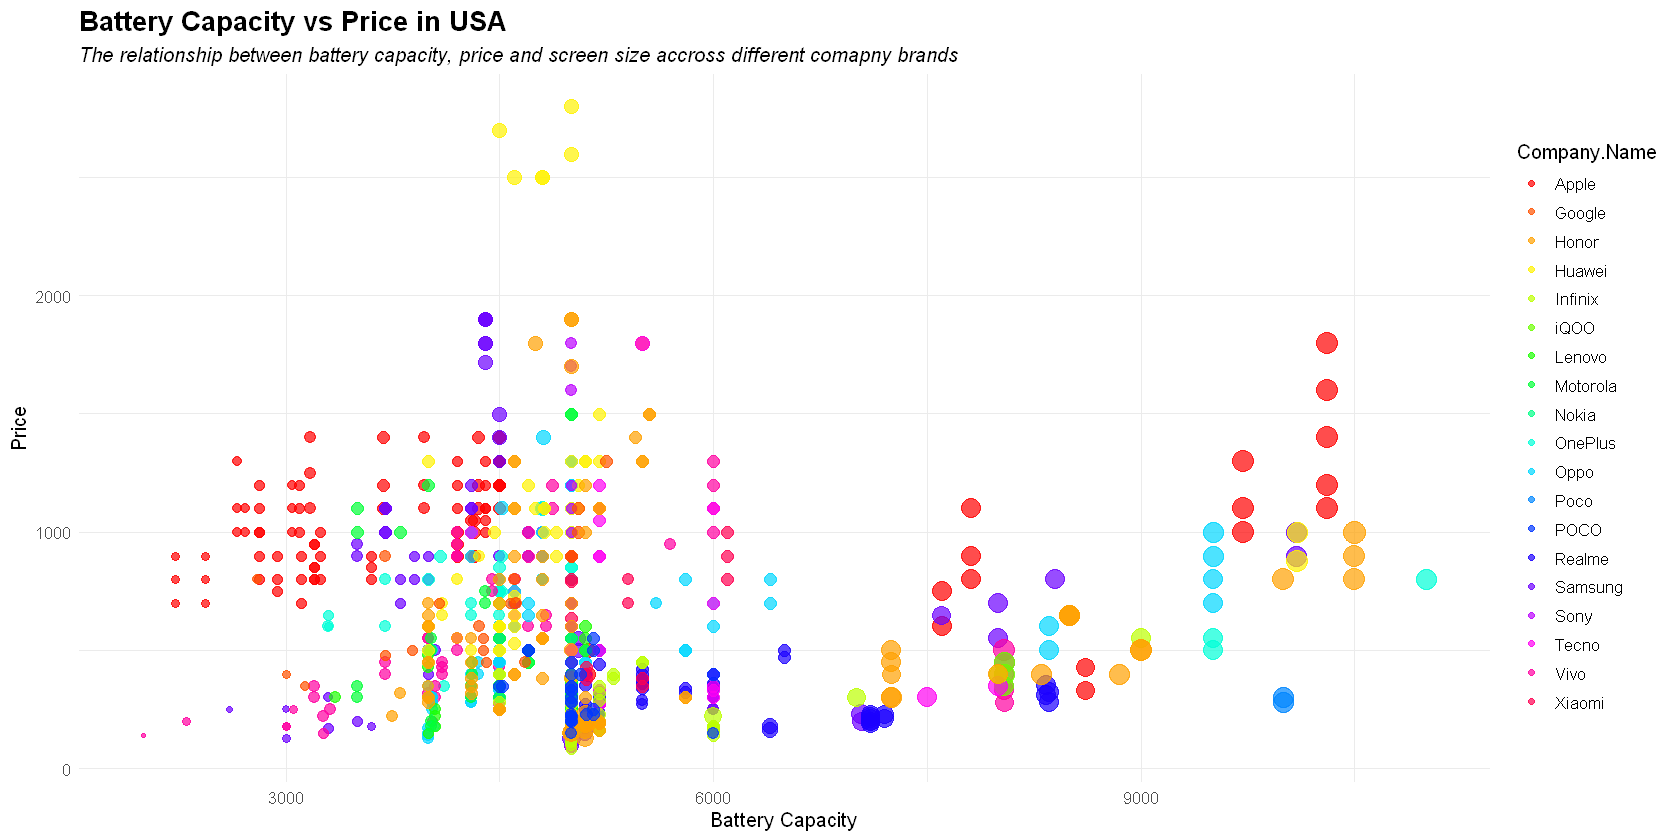

In [32]:
ggplot(df, aes(x = Battery.Capacity.mAh, y = Launched.Price.USA.USD, color = Company.Name, size = Screen.Size.inches)) + 
  geom_point(alpha = 0.7) +
  labs(
    title = "Battery Capacity vs Price in USA",
    subtitle = "The relationship between battery capacity, price and screen size accross different comapny brands",
    x = "Battery Capacity",
    y = "Price"
  ) + 
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  ) +
  scale_color_manual(values = rainbow(length(unique(df$Company.Name)))) +
  guides(size = "none")

### Plot 3

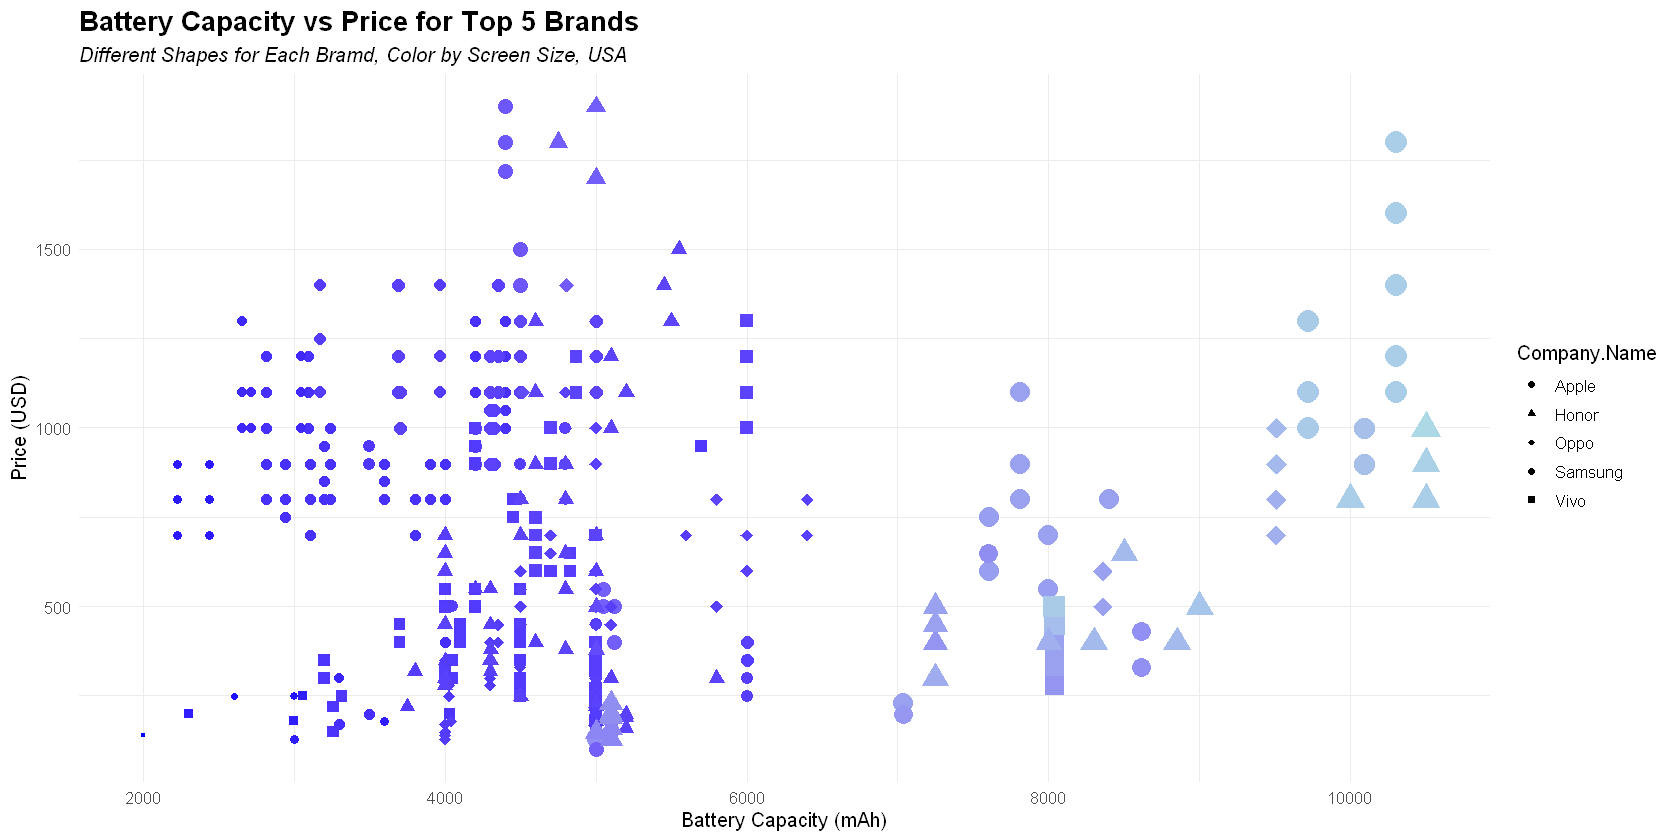

In [33]:
df_selected <- df %>%
  filter(Company.Name %in% c("Apple", "Honor", "Oppo", "Samsung", "Vivo"))

ggplot(df_selected, aes(x = Battery.Capacity.mAh, y = Launched.Price.USA.USD, color = Screen.Size.inches, shape = Company.Name, size = Screen.Size.inches)) + 
  geom_point(alpha = 1.0) + 
  labs(
    title = "Battery Capacity vs Price for Top 5 Brands",
    subtitle = "Different Shapes for Each Bramd, Color by Screen Size, USA",
    x = "Battery Capacity (mAh)",
    y = "Price (USD)"
  ) + 
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12, face = "italic"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10)
  ) +
  scale_color_gradient(low = "blue", high = "lightblue") +
  scale_shape_manual(values = c(16, 17, 18, 19, 15)) +
  guides(size = "none", color = "none")